# Descriptive Spatial Analysis

#### !!! As this notebook uses h3 package it will NOT WORK ON WINDOWS !!!

This notebook reads in hexagon files and does a desprictive spatial analysis.

### What is done?
1. Load Hexagon files
2. TODO

### Input

- data/output/Trips_Hexagons.csv

### Output
- Nothing, only plots
    
---------------------------------------------------------

In [1]:
!pip install folium

     |████████████████████████████████| 93 kB 663 kB/s eta 0:00:011


In [2]:
import os
import pandas as pd
from h3 import h3
from shapely.geometry import shape
import geopandas
import matplotlib.pyplot as plt
import folium
from folium.plugins import TimeSliderChoropleth
import branca.colormap as cm
from statistics import stdev

In [3]:
path_trips_hex=os.path.join(os.getcwd(), "..", "data", "output", "Trips.csv")
path_hex_small=os.path.join(os.getcwd(), "..", "data", "output", "hexagons-small-dresden.geojson")
path_hex_big=os.path.join(os.getcwd(), "..", "data", "output", "hexagons-big-dresden.geojson")

print(path_trips_hex)
print(path_hex_small)
print(path_hex_big)

/home/jovyan/work/notebooks/../data/output/Trips.csv
/home/jovyan/work/notebooks/../data/output/hexagons-small-dresden.geojson
/home/jovyan/work/notebooks/../data/output/hexagons-big-dresden.geojson


In [4]:
pd.set_option('display.max_columns', None)
df_trips_hex = pd.read_csv(path_trips_hex, index_col="Unnamed: 0")
df_trips_hex

,p_bike_racks_start,p_spot_start,p_booked_bikes_start,p_place_type_start,datetime_start,b_number_start,p_uid_start,p_bikes_start,p_lat_start,b_electric_lock_start,b_bike_type_start,p_name_start,p_free_racks_start,b_lock_types_start,p_number_start,p_lng_start,b_boardcomputer_start,p_maintenance_start,p_bike_racks_end,p_spot_end,p_booked_bikes_end,p_place_type_end,datetime_end,p_uid_end,p_bikes_end,p_lat_end,p_name_end,p_free_racks_end,p_number_end,p_lng_end,p_maintenance_end,air_deg,air_hum,rain_mm,rain_yn,sun_hour,wind_ms,month_start,month_end,day_start,day_end,day_of_week_start,day_of_week_end,hour_start,hour_end,day_of_year_start,day_of_year_end,season,weekend,booking_date_start,trip_duration,idle_time,24_sum,6_sum,2_sum,1_sum,h3_hex_small_id_start,h3_hex_small_id_end,h3_hex_big_id_start,h3_hex_big_id_end,24_demand,24_demand_hex_big,24_demand_hex_small,24_agg_time,6_demand,6_demand_hex_big,6_demand_hex_small,6_agg_time,2_demand,2_demand_hex_big,2_demand_hex_small,2_agg_time,1_demand,1_demand_hex_big,1_demand_hex_small,1_agg_time
0,0,False,0,12,2019-01-20 00:00:00,93771,12095573,1,51.071262,False,15,BIKE 93771,0,analog_code_lock,0.0,13.750380,22532,False,0,False,0,12,2019-01-20 00:28:00,12099518,1,51.046234,BIKE 93771,0,0.0,13.693052,False,-3.3,75.3,0.0,0.0,0.0,4.3,1,1,20,20,6,6,0,0,20,20,1,True,2019-01-20 00:00:00,28.0,0.0,265,36,19,8,881f1b54bbfffff,881f1b5599fffff,861f1b54fffffff,861f1b55fffffff,265,65,17,2019-01-20 00:00:00,47,13,3,2019-01-20 00:00:00,27,7,2,2019-01-20 00:00:00,19,5,2,2019-01-20 00:00:00
1,0,True,0,0,2019-01-20 00:05:00,93576,10299640,5,51.038210,False,15,Wohnheim Gret-Palucca.Straße / Lenneplatz,0,analog_code_lock,4486.0,13.744712,0,False,0,False,0,12,2019-01-20 00:15:00,12099344,1,51.049069,BIKE 93576,0,0.0,13.744122,False,-3.3,75.3,0.0,0.0,0.0,4.3,1,1,20,20,6,6,0,0,20,20,1,True,2019-01-20 00:00:00,10.0,0.0,265,33,17,17,881f1b4609fffff,881f1b465dfffff,861f1b467ffffff,861f1b467ffffff,265,146,7,2019-01-20 00:00:00,47,25,2,2019-01-20 00:00:00,27,13,2,2019-01-20 00:00:00,19,8,2,2019-01-20 00:00:00
2,0,True,0,0,2019-01-20 00:07:00,93440,10299584,1,51.042570,True,0,Malterstraße (Haltestelle),0,frame_lock,4483.0,13.691130,7551004130,False,0,True,0,0,2019-01-20 00:33:00,4405670,3,51.028370,Wundtstr. / Zellescher Weg,0,4458.0,13.747730,False,-3.3,75.3,0.0,0.0,0.0,4.3,1,1,20,20,6,6,0,0,20,20,1,True,2019-01-20 00:00:00,26.0,0.0,265,33,17,17,881f1b5591fffff,881f1b4601fffff,861f1b55fffffff,861f1b467ffffff,265,27,6,2019-01-20 00:00:00,47,5,2,2019-01-20 00:00:00,27,5,2,2019-01-20 00:00:00,19,5,2,2019-01-20 00:00:00
3,0,False,0,12,2019-01-20 00:07:00,93322,12098234,1,51.041798,False,0,BIKE 93322,0,analog_code_lock,0.0,13.689620,1265,False,0,False,0,12,2019-01-20 00:09:00,12098234,1,51.041798,BIKE 93322,0,0.0,13.689620,False,-3.3,75.3,0.0,0.0,0.0,4.3,1,1,20,20,6,6,0,0,20,20,1,True,2019-01-20 00:00:00,2.0,0.0,265,33,17,17,881f1b5591fffff,881f1b5591fffff,861f1b55fffffff,861f1b55fffffff,265,27,6,2019-01-20 00:00:00,47,5,2,2019-01-20 00:00:00,27,5,2,2019-01-20 00:00:00,19,5,2,2019-01-20 00:00:00
4,0,True,0,0,2019-01-20 00:07:00,93585,264575,5,51.071740,False,15,Friedensstraße/Conradstr.,0,analog_code_lock,4373.0,13.741257,0,False,0,True,0,0,2019-01-20 00:35:00,264575,5,51.071740,Friedensstraße/Conradstr.,0,4373.0,13.741257,False,-3.3,75.3,0.0,0.0,0.0,4.3,1,1,20,20,6,6,0,0,20,20,1,True,2019-01-20 00:00:00,28.0,0.0,265,33,17,17,881f1b54b9fffff,881f1b54b9fffff,861f1b54fffffff,861f1b54fffffff,265,65,10,2019-01-20 00:00:00,47,13,2,2019-01-20 00:00:00,27,7,2,2019-01-20 00:00:00,19,5,2,2019-01-20 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
567434,0,True,0,0,2020-01-20 23:29:00,93908,11248297,3,51.043537,True,71,Tharandter Straße,0,frame_lock,4507.0,13.703979,7551

## 2. Create GeoDataFrames

,h3_hex_small_id,geometry
0,881f1b09e7fffff,"POLYGON ((13.86368 51.04774, 13.86148 51.04341..."
1,881f1b09b9fffff,"POLYGON ((13.91094 51.04790, 13.90874 51.04358..."
2,881f1b44c9fffff,"POLYGON ((13.82773 50.99020, 13.82554 50.98587..."
3,881f1b54a7fffff,"POLYGON ((13.70640 51.05631, 13.70421 51.05198..."
4,881f1b098dfffff,"POLYGON ((13.88285 51.05891, 13.88065 51.05459..."
...,...,...
460,881f1b4645fffff,"POLYGON ((13.71239 51.04154, 13.71020 51.03721..."
461,881f1b091dfffff,"POLYGON ((13.82962 51.07352, 13.82742 51.06919..."
462,881f1b46e9fffff,"POLYGON ((13.79070 51.02339, 13.78851 51.01906..."
463,881f1b46bdfffff,"POLYGON ((13.83432 51.00319, 13.83212 50.99886..."


,h3_hex_big_id,geometry
0,861f1b467ffffff,"POLYGON ((13.70939 51.04892, 13.69407 51.01862..."
1,861f1b0b7ffffff,"POLYGON ((13.75544 51.13976, 13.74008 51.10950..."
2,861f1b097ffffff,"POLYGON ((13.77638 51.08809, 13.76102 51.05780..."
3,861f1b55fffffff,"POLYGON ((13.62149 51.06140, 13.60621 51.03109..."
4,861f1b09fffffff,"POLYGON ((13.86433 51.07550, 13.84893 51.04522..."
5,861f1b46fffffff,"POLYGON ((13.79729 51.03637, 13.78193 51.00607..."
6,861f1b087ffffff,"POLYGON ((13.84345 51.12721, 13.82805 51.09694..."
7,861f1b547ffffff,"POLYGON ((13.60046 51.11305, 13.58518 51.08276..."
8,861f1b54fffffff,"POLYGON ((13.68842 51.10061, 13.67310 51.07032..."
9,861f1b56fffffff,"POLYGON ((13.66742 51.15224, 13.65210 51.12198..."


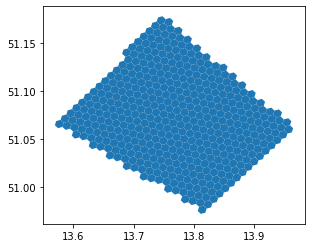

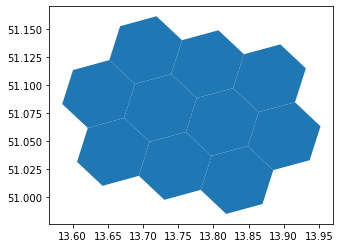

In [5]:
# Load geodata dataframes and plot them
gdf_hex_small = geopandas.read_file(path_hex_small)
gdf_hex_small.plot()
gdf_hex_big = geopandas.read_file(path_hex_big)
gdf_hex_big.plot()
display(gdf_hex_small, gdf_hex_big)

In [6]:
def plot_choropleth_map(df, hex_size, time_res):
    """Plots a choropleth graph on a map based on the number of started trips in each hexagon.
    The fixed bike stations are marked as well
    
    Args:
        df (DataFrame):       DataFrame with trip data from Dresden
        hex_size (str):       String which contains hexagons to use (possible values: big (size 6) & small(8))
        time_res:             Selected time resolution: 24h, 6h, 2h or 1h
    
    Returns:
        no return
    """
    
    # Initialize variables due to the hex size
    if (hex_size == "small"):
        hex_id_column_to_aggregate_on = "h3_hex_small_id_start"
        other_hex_id_column = "h3_hex_big_id_start"
        gdf_hexagons = gdf_hex_small
        gdf_hex_id_column = "h3_hex_small_id"
    elif (hex_size == "big"):
        hex_id_column_to_aggregate_on = "h3_hex_big_id_start"
        other_hex_id_column = "h3_hex_small_id_start"
        gdf_hexagons = gdf_hex_big
        gdf_hex_id_column = "h3_hex_big_id"
    else:
        print("Wrong hex_size given. Choose either 'small' or 'big' and try again.")
        return
    
    # Compute standard deviation for the demand per hexagon
    sigma = df_trips_hex[time_res+"_demand_hex_"+hex_size].std()
    # Filter all demand values greater than 3 times the standard deviation of the selected demand per hexagon column
    filtered_df_trips_hex = df_trips_hex[df_trips_hex[time_res+"_demand_hex_"+hex_size] < sigma*3]
    
    # Initialize dataframe for map data    
    df_map = filtered_df_trips_hex[[hex_id_column_to_aggregate_on, time_res+"_agg_time", time_res+"_demand_hex_"+hex_size]].copy()  
    
    # Convert date time to seconds (necessary for the map visualization) & rename selected columns
    df_map["date_sec"] = pd.to_datetime(df_map[time_res+"_agg_time"]).astype(int) / 10**9
    df_map["date_sec"] = df_map["date_sec"].astype(int).astype(str)
    df_map.rename(columns={hex_id_column_to_aggregate_on: "hex_id"}, inplace=True)
    
    # Compute color for hexagons
    max_color = max(df_map[time_res+'_demand_hex_'+hex_size])
    min_color = min(df_map[time_res+'_demand_hex_'+hex_size])
    cmap = cm.linear.YlOrRd_09.scale(min_color, max_color)
    df_map['color'] = df_map[time_res+'_demand_hex_'+hex_size].map(cmap)
    
    # Create list with all hexagon IDs
    hex_list = gdf_hexagons[gdf_hex_id_column].unique().tolist()
    hex_idx = range(len(hex_list))
    
    # Dictionary with relevant data for map visualization
    style_dict = {}
    for i in hex_idx:
        # ID of current hexagon
        hexagon = hex_list[i]
        # All count values of the current hexagon
        result = df_map[df_map['hex_id'] == hexagon]
        inner_dict = {}
        for _, r in result.iterrows():
            inner_dict[r['date_sec']] = {'color': r['color'], 'opacity': 0.7}
        style_dict[str(i)] = inner_dict
    
    print("Max count:", df_map[time_res+"_demand_hex_"+hex_size].max(), "// Min count:", df_map[time_res+"_demand_hex_"+hex_size].min())
    
    # Set coordinates of Dresdner Frauenkirche as center of the map
    dome = [51.052090, 13.741617]
    # Create map with "dome" center and set zoom factor to 13
    m = folium.Map(dome, zoom_start=13)
    
    # Create a choropleth over time
    TimeSliderChoropleth(
        data=gdf_hexagons.to_json(),
        name="Hexagons over time",
        styledict=style_dict
    ).add_to(m)

    # Add color legend to the map
    cmap.add_to(m)

    # Print bike stations on the map, != 0 because p-number = 0 means flexible bikes --> Everything != 0 are stations
    df = df[df["p_number_start"] != 0.0]
    df_stations = df.drop_duplicates("p_number_start", keep="first")
    
    # Make a group for bike stations for toggling on the map
    fixedStations = folium.FeatureGroup(name="Fixed Stations")
    
    # Create blue markers for each station
    for index, row in df_stations.iterrows():
        folium.CircleMarker(
            [row["p_lat_start"], row["p_lng_start"]],
            radius=3,
            popup=folium.Popup(
                "<b>Station Name:</b><br>" +
                str(row["p_name_start"]), max_width=400),
            fill=True,
            fill_color="#3db7e4",
            color="#3db7e4"
        ).add_to(fixedStations)

    fixedStations.add_to(m)
    
    # Keep all points over hexagons & add map as new layer
    m.keep_in_front(fixedStations)
    folium.LayerControl().add_to(m)
    
    # Points of interest
    # Icons: https://fontawesome.com/v4.7.0/icons/
    uni = [51.0292, 13.729]
    folium.Marker(
        location=uni,
        tooltip="University",
        icon=folium.Icon(color="black", icon="graduation-cap", prefix="fa"),
    ).add_to(m)
    
    stadium = [51.040925, 13.747975]
    folium.Marker(
        location=stadium,
        tooltip="Stadium",
        icon=folium.Icon(color="green", icon="soccer-ball-o", prefix="fa"),
    ).add_to(m)
    
    folium.Marker(
        location=dome,
        tooltip="Dresdner Frauenkirche",
        icon=folium.Icon(color="blue", icon="cloud", prefix="fa"),
    ).add_to(m)
    
    central_station = [51.040501, 13.731411]
    folium.Marker(
        location=central_station,
        tooltip="Central Station",
        icon=folium.Icon(color="red", icon="train", prefix="fa"),
    ).add_to(m)
    
    bib = [51.028625, 13.737005]
    folium.Marker(
        location=bib,
        tooltip="Central Library",
        icon=folium.Icon(color="purple", icon="book", prefix="fa"),
    ).add_to(m)

    path_map=os.path.join(os.getcwd(), "..", "data", "output", "choropleth_map_" + hex_size + "_" +  time_res + ".html")
    
    m.save(path_map)
    
    print("Saved:", path_map)

In [14]:
# Plot map with hexagons, time slider and bike station markers
plot_choropleth_map(df=df_trips_hex, hex_size="big", time_res="1")

Max count: 394 // Min count: 1
Saved: /home/jovyan/work/notebooks/../data/output/choropleth_map_big_1.html
